In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Import Data**

In [2]:
df = pd.read_csv('CAR DETAILS.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

**Observation** There are 4340 rows and 8 columns in the dataset originally.

**Handling null values**

In [5]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

**Observation** There are no null values.

**Handling duplicate values**

In [6]:
df.duplicated().sum()

763

In [7]:
print(f'Percentage of duplicated values : {round(df.duplicated().sum() / df.shape[0] * 100, 2)}%')

Percentage of duplicated values : 17.58%


**Dropping duplicated values**

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
print(f'Percentage of duplicated values : {round(df.duplicated().sum() / df.shape[0] * 100, 2)}%')

Percentage of duplicated values : 0.0%


Now there are no duplicate values in the dataframe.

**Creating new column**

In [10]:
df['brand'] = df['name'].apply(lambda x : x.split(' ')[0])

In [11]:
df.drop('name', axis = 1, inplace = True) 

In [12]:
df = df.loc[:, ['brand', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price']]

**Categorical and Numerical columns**

In [13]:
cat_cols = df.select_dtypes(include = 'object').columns.to_list()
num_cols = df.select_dtypes(exclude = 'object').columns.to_list()

In [14]:
print(cat_cols)
print(num_cols)

['brand', 'fuel', 'seller_type', 'transmission', 'owner']
['year', 'km_driven', 'selling_price']


**Categorical columns** brand, fuel, seller_type, transmission, owner<br>
**Numerical columns** year, km_driven, selling_price

**EDA for Categorical columns**

In [15]:
for i in cat_cols:
    print(i)

brand
fuel
seller_type
transmission
owner


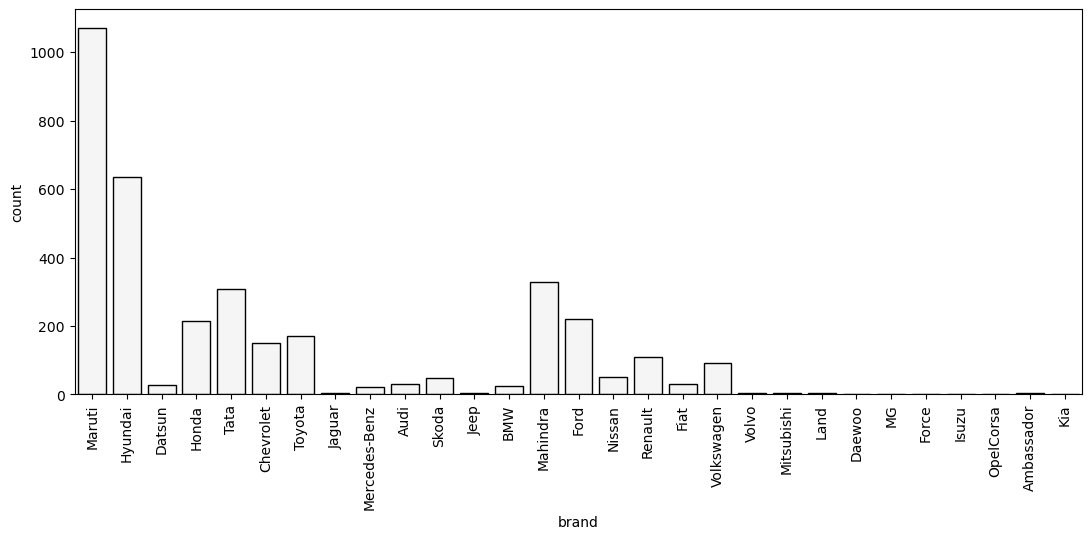

In [16]:
plt.figure(figsize = (13, 5))
sns.countplot(data = df, x = df.loc[:,'brand'], color = 'whitesmoke', edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

**Observation** Most cars are from Maruti and Hyundai brand.

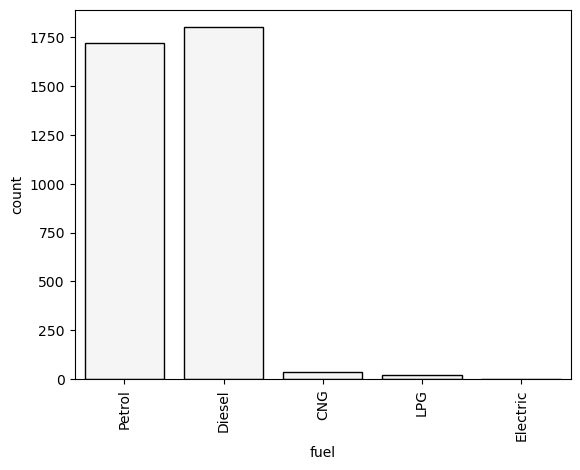

In [17]:
sns.countplot(data = df, x = df.loc[:, 'fuel'], color = 'whitesmoke', edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

**Observation** Most cars in dataset are from petrol and diesel datset.

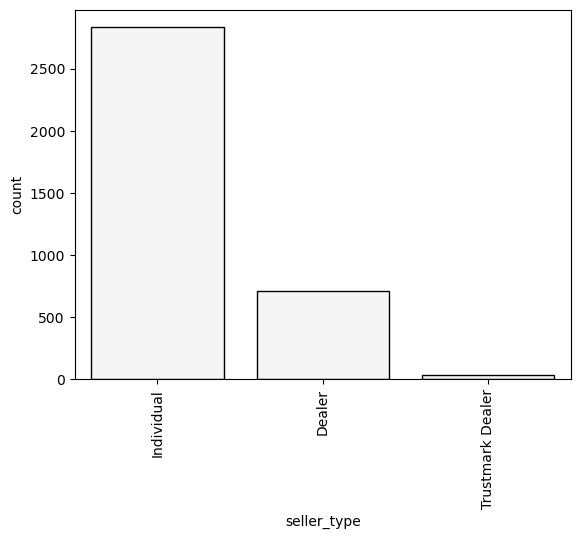

In [18]:
sns.countplot(data = df, x = df.loc[:, 'seller_type'], color = 'whitesmoke', edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

**Observation** Most cars are sold individually.

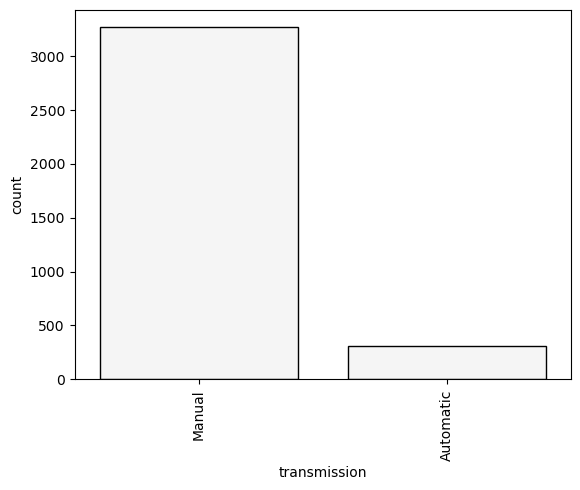

In [19]:
sns.countplot(data = df, x = df.loc[:, 'transmission'], color = 'whitesmoke', edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

**Observation** Most cars are having manual transmission.

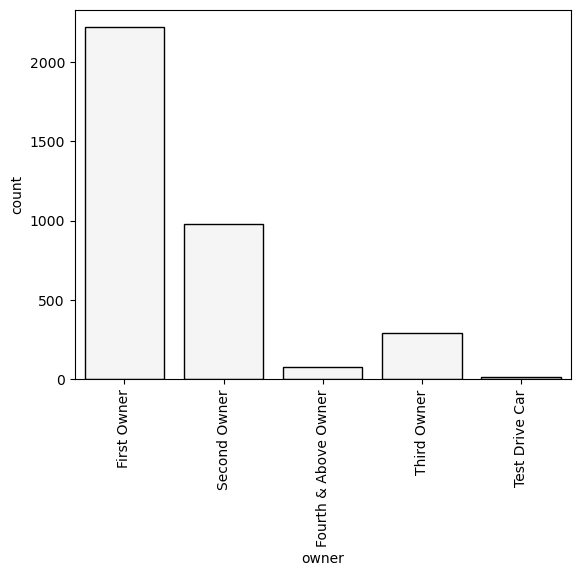

In [20]:
sns.countplot(data = df, x = df.loc[:, 'owner'], color = 'whitesmoke', edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

**Observation** Most cars in the datset are having 'first hand' ownership followed by 'second hand' ownership.

**Comparing categorical columns with target variable.**

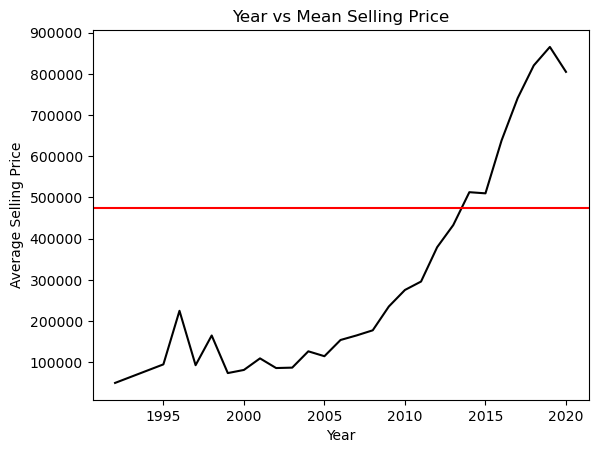

In [21]:
year_vs_price = df.groupby('year')['selling_price'].mean().reset_index()
plt.plot(year_vs_price['year'], year_vs_price['selling_price'], color = 'black')
plt.axhline(df['selling_price'].mean(), color = 'red')
plt.title('Year vs Mean Selling Price')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.show()

**Observation** Cars from 2015 year onward have selling price higher than average.

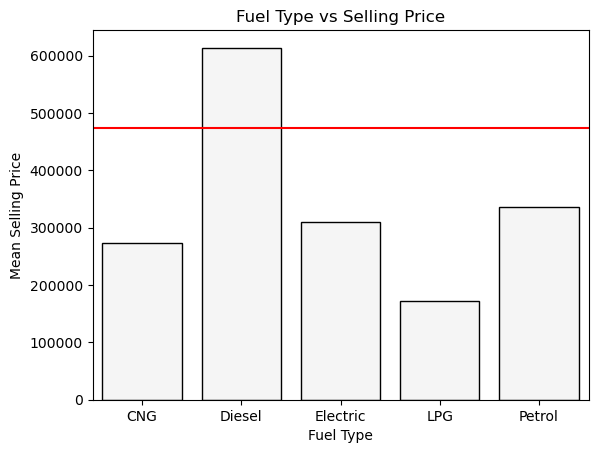

In [22]:
fuel_vs_price = df.groupby('fuel')['selling_price'].mean().reset_index()
sns.barplot(data = fuel_vs_price, x = 'fuel', y = 'selling_price', color = 'whitesmoke', edgecolor = 'black')
plt.axhline(df['selling_price'].mean(), color = 'red')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Selling Price')
plt.title('Fuel Type vs Selling Price')
plt.show()

**Observation** Cars with diesel type fuel have selling price higher than average.

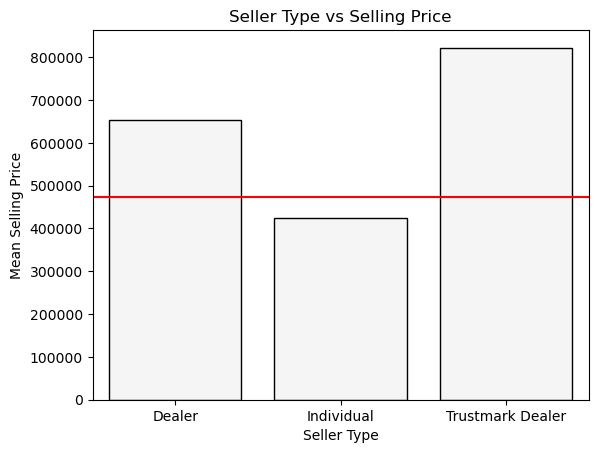

In [23]:
seller_vs_price = df.groupby('seller_type')['selling_price'].mean().reset_index()
sns.barplot(data = seller_vs_price, x = 'seller_type', y = 'selling_price', color = 'whitesmoke', edgecolor = 'black')
plt.axhline(df['selling_price'].mean(), color = 'red')
plt.xlabel('Seller Type')
plt.ylabel('Mean Selling Price')
plt.title('Seller Type vs Selling Price')
plt.show()

**Observation** If cars are sold through trustmark dealer or a dealer then its selling price is observed to be higher than mean selling price.

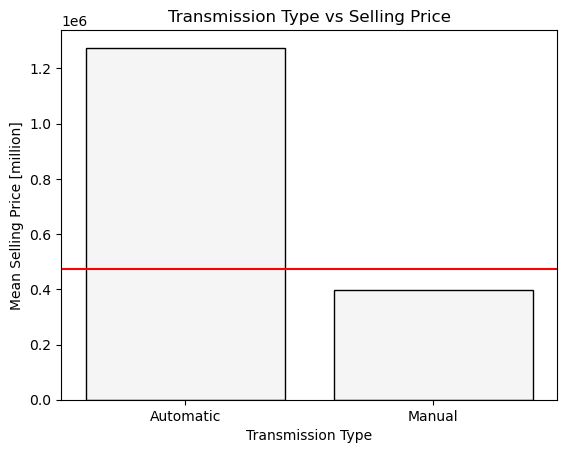

In [24]:
transmission_vs_price = df.groupby('transmission')['selling_price'].mean().reset_index()
sns.barplot(data = transmission_vs_price, x = 'transmission', y = 'selling_price', color = 'whitesmoke', edgecolor = 'black')
plt.axhline(df['selling_price'].mean(), color = 'red')
plt.xlabel('Transmission Type')
plt.ylabel('Mean Selling Price [million]')
plt.title('Transmission Type vs Selling Price')
plt.show()

**Observation** Cars having automatic transmission have selling price higher than mean selling price.

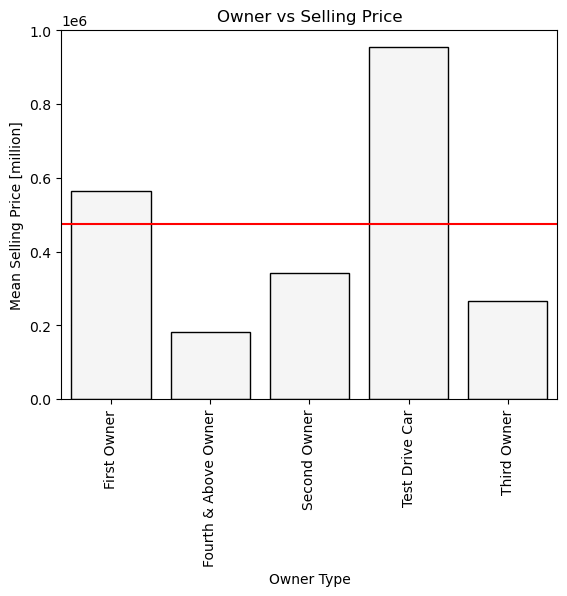

In [25]:
owner_vs_price = df.groupby('owner')['selling_price'].mean().reset_index()
sns.barplot(data = owner_vs_price, x = 'owner', y = 'selling_price', color = 'whitesmoke', edgecolor = 'black')
plt.axhline(df['selling_price'].mean(), color = 'red')
plt.xlabel('Owner Type')
plt.ylabel('Mean Selling Price [million]')
plt.title('Owner vs Selling Price')
plt.xticks(rotation = 90)
plt.show()


**Observation** Test drive cars have selling price higher than mean selling price.

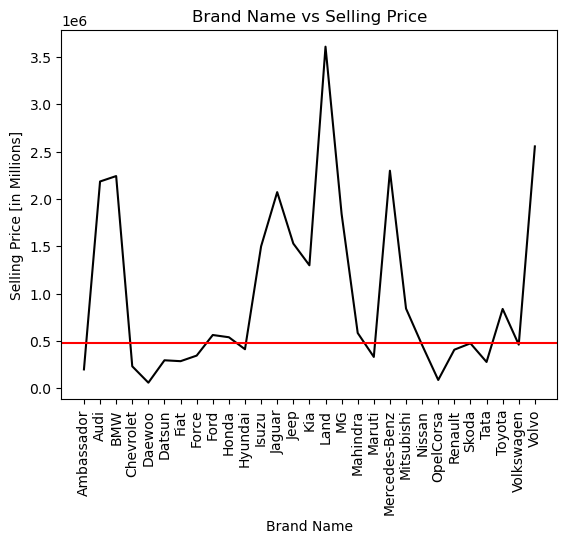

In [26]:
brand_vs_selling_price = df.groupby('brand')['selling_price'].mean().reset_index()
plt.plot(brand_vs_selling_price['brand'], brand_vs_selling_price['selling_price'], color = 'black')
plt.axhline(df['selling_price'].mean(), color = 'red')
plt.xticks(rotation = 90)
plt.xlabel('Brand Name')
plt.ylabel('Selling Price [in Millions]')
plt.title('Brand Name vs Selling Price')
plt.show()

**Observation** Following brands have higher selling prices than other brand names.
There are as follows.

In [27]:
df[df['selling_price'] > (3 * df['selling_price'].mean())]['brand'].value_counts()

brand
Toyota           26
Audi             18
BMW              18
Mercedes-Benz    12
Ford              9
Mahindra          7
Jaguar            5
Hyundai           5
Land              5
Volvo             4
Tata              2
Jeep              2
MG                2
Honda             1
Isuzu             1
Name: count, dtype: int64

Above brands have selling price 3 times higher than the sellign price.

**Handling numerical columns**

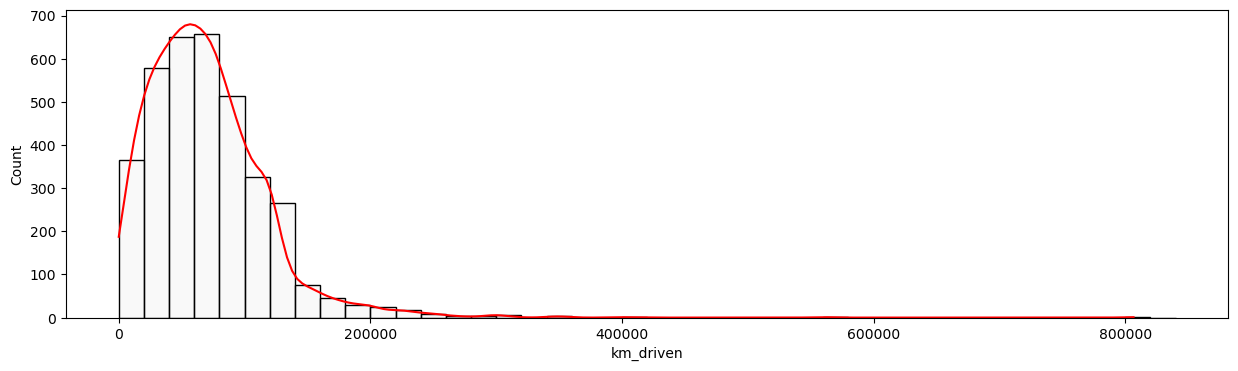

In [28]:
plt.figure(figsize = (15, 4))
ax = sns.histplot(data = df, x = 'km_driven', color = 'whitesmoke', kde = True, bins = range(0, 850000, 20000))
ax.lines[0].set_color('red')
plt.show()

**Observation** Here we can observe a very high degree of skewness in km_driven column.

In [29]:
print(f'Degree of skewness in km_driven : {df["km_driven"].skew()}')

Degree of skewness in km_driven : 2.5485218408049053


**Boxplot of km_driven**

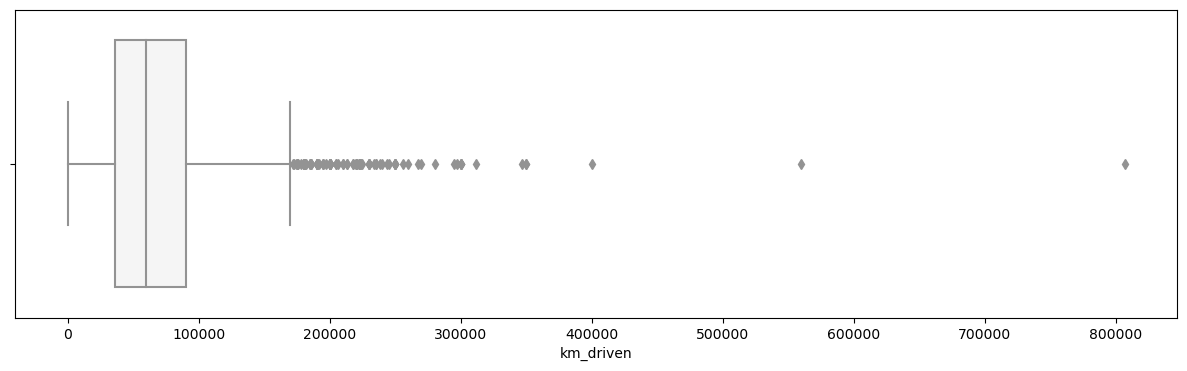

In [30]:
plt.figure(figsize = (15, 4))
ax = sns.boxplot(data = df, x = 'km_driven', color = 'whitesmoke')
plt.show()

**Outlier handlinf for km_driven**

In [31]:
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3 - q1

min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

print(min_limit)
print(max_limit)

-45000.0
171000.0


In [32]:
df['km_driven'] = np.where(df['km_driven'] > max_limit, max_limit, df['km_driven'])
df['km_driven'] = np.where(df['km_driven'] < min_limit, min_limit, df['km_driven'])

**Boxplot after outlier handling**

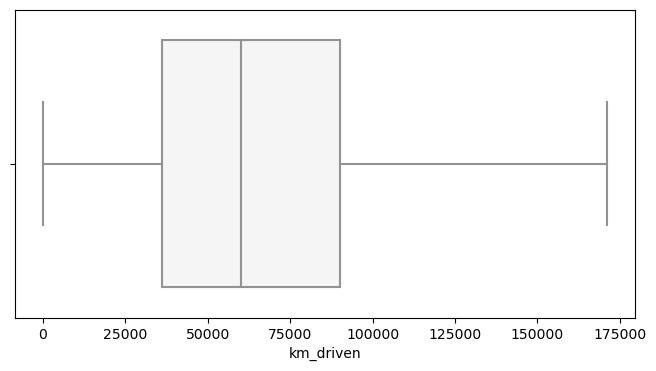

In [33]:
plt.figure(figsize = (8, 4))
ax = sns.boxplot(data = df, x = 'km_driven', color = 'whitesmoke')
plt.show()

**Creating a copy of the dataframe**

In [34]:
df_encoded = df.copy()

**Label encoding on categorical columns**

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
df_encoded = pd.get_dummies(df_encoded, columns = ['brand'])

In [37]:
le = LabelEncoder()
df_encoded['fuel'] = le.fit_transform(df_encoded['fuel'])
df_encoded['seller_type'] = le.fit_transform(df_encoded['seller_type'])
df_encoded['transmission'] = le.fit_transform(df_encoded['transmission'])
df_encoded['owner'] = le.fit_transform(df_encoded['owner'])

In [38]:
df_encoded.head()

,year,km_driven,fuel,seller_type,transmission,owner,selling_price,brand_Ambassador,brand_Audi,brand_BMW,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,70000.0,4,1,1,0,60000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2007,50000.0,4,1,1,0,135000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2012,100000.0,1,1,1,0,600000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2017,46000.0,4,1,1,0,250000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,141000.0,1,1,1,2,450000,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Separating dependent and independent columns**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df_encoded.drop('selling_price', axis = 1)
y = df_encoded['selling_price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 77)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2682, 35)
(895, 35)
(2682,)
(895,)


In [43]:
print(f'Test data size : {round(X_test.shape[0] / df_encoded.shape[0] * 100, 2)}%')

Test data size : 25.02%


**Observation**
1. Target variable is continuous column.
2. therefore problem is an regression problem.
3. we will apply following models one by one and then select best performing model.

**Regressor Models**

1. Linear regression.
2. Ridge regression.
3. Lasso regression
4. TreeRegressor.
5. Bagging
6. Gradient Boosting

**Creating function for model evaluation**

In [44]:
score = {}

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_eval(y, y_pred):
  print(f'mean absolute error : {mean_absolute_error(y, y_pred)}')
  print(f'mean squared error : {mean_squared_error(y, y_pred)}')
  print(f'root mean squared error : {np.sqrt(mean_squared_error(y, y_pred))}')
  print(f'r2 score : {r2_score(y, y_pred)}')

def model_score(model):
  print(f'train score : {model.score(X_train, y_train)}')
  print(f'test score : {model.score(X_test, y_test)}')

**Linear Regression**

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
model_eval(y_test, y_pred)
model_score(lr)

mean absolute error : 173001.51944200534
mean squared error : 90741915709.51537
root mean squared error : 301233.9883039684
r2 score : 0.6575245534806946
train score : 0.627951354797617
test score : 0.6575245534806946


In [47]:
score['Linear Regression'] = lr.score(X_test, y_test)

**Ridge Regression**

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [49]:
ridge_model = Ridge()

parameter = {
    'alpha' : np.arange(0, 10, 0.01)
}

ridge_cv = GridSearchCV(estimator = ridge_model, param_grid = parameter, verbose = 2)

In [50]:
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.24; total time=   0.0s
[CV] END .........................................alpha=0.24; total time=   0.0s
[CV] END .........................................alpha=0.24; total time=   0.0s
[CV] END .........................................alpha=0.24; total time=   0.0s
[CV] END .........................................alpha=0.24; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.45; total time=   0.0s
[CV] END .........................................alpha=0.45; total time=   0.0s
[CV] END .........................................alpha=0.45; total time=   0.0s
[CV] END .........................................alpha=0.45; total time=   0.0s
[CV] END .........................................alpha=0.45; total time=   0.0s
[CV] END .........................................alpha=0.46; total time=   0.0s
[CV] END .........................................alpha=0.46; total time=   0.0s
[CV] END .........................................alpha=0.46; total time=   0.0s
[CV] END .........................................alpha=0.46; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.88; total time=   0.0s
[CV] END .........................................alpha=0.88; total time=   0.0s
[CV] END .........................................alpha=0.88; total time=   0.0s
[CV] END .........................................alpha=0.88; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END ..........................................alpha=0.9; total time=   0.0s
[CV] END ..........................................alpha=0.9; total time=   0.0s
[CV] END ..........................................alpha=0.9; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=1.08; total time=   0.0s
[CV] END .........................................alpha=1.08; total time=   0.0s
[CV] END .........................................alpha=1.09; total time=   0.0s
[CV] END .........................................alpha=1.09; total time=   0.0s
[CV] END .........................................alpha=1.09; total time=   0.0s
[CV] END .........................................alpha=1.09; total time=   0.0s
[CV] END .........................................alpha=1.09; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=1.3; total time=   0.0s
[CV] END ..........................................alpha=1.3; total time=   0.0s
[CV] END ..........................................alpha=1.3; total time=   0.0s
[CV] END ..........................................alpha=1.3; total time=   0.0s
[CV] END .........................................alpha=1.31; total time=   0.0s
[CV] END .........................................alpha=1.31; total time=   0.0s
[CV] END .........................................alpha=1.31; total time=   0.0s
[CV] END .........................................alpha=1.31; total time=   0.0s
[CV] END .........................................alpha=1.31; total time=   0.0s
[CV] END .........................................alpha=1.32; total time=   0.0s
[CV] END .........................................alpha=1.32; total time=   0.0s
[CV] END .........................................alpha=1.32; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=1.51; total time=   0.0s
[CV] END .........................................alpha=1.52; total time=   0.0s
[CV] END .........................................alpha=1.52; total time=   0.0s
[CV] END .........................................alpha=1.52; total time=   0.0s
[CV] END .........................................alpha=1.52; total time=   0.0s
[CV] END .........................................alpha=1.52; total time=   0.0s
[CV] END .........................................alpha=1.53; total time=   0.0s
[CV] END .........................................alpha=1.53; total time=   0.0s
[CV] END .........................................alpha=1.53; total time=   0.0s
[CV] END .........................................alpha=1.53; total time=   0.0s
[CV] END .........................................alpha=1.53; total time=   0.0s
[CV] END .........................................alpha=1.54; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=1.74; total time=   0.0s
[CV] END .........................................alpha=1.74; total time=   0.0s
[CV] END .........................................alpha=1.74; total time=   0.0s
[CV] END .........................................alpha=1.75; total time=   0.0s
[CV] END .........................................alpha=1.75; total time=   0.0s
[CV] END .........................................alpha=1.75; total time=   0.0s
[CV] END .........................................alpha=1.75; total time=   0.0s
[CV] END .........................................alpha=1.75; total time=   0.0s
[CV] END .........................................alpha=1.76; total time=   0.0s
[CV] END .........................................alpha=1.76; total time=   0.0s
[CV] END .........................................alpha=1.76; total time=   0.0s
[CV] END .........................................alpha=1.76; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=1.96; total time=   0.0s
[CV] END .........................................alpha=1.97; total time=   0.0s
[CV] END .........................................alpha=1.97; total time=   0.0s
[CV] END .........................................alpha=1.97; total time=   0.0s
[CV] END .........................................alpha=1.97; total time=   0.0s
[CV] END .........................................alpha=1.97; total time=   0.0s
[CV] END .........................................alpha=1.98; total time=   0.0s
[CV] END .........................................alpha=1.98; total time=   0.0s
[CV] END .........................................alpha=1.98; total time=   0.0s
[CV] END .........................................alpha=1.98; total time=   0.0s
[CV] END .........................................alpha=1.98; total time=   0.0s
[CV] END .........................................alpha=1.99; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=2.19; total time=   0.0s
[CV] END .........................................alpha=2.19; total time=   0.0s
[CV] END .........................................alpha=2.19; total time=   0.0s
[CV] END .........................................alpha=2.19; total time=   0.0s
[CV] END ..........................................alpha=2.2; total time=   0.0s
[CV] END ..........................................alpha=2.2; total time=   0.0s
[CV] END ..........................................alpha=2.2; total time=   0.0s
[CV] END ..........................................alpha=2.2; total time=   0.0s
[CV] END ..........................................alpha=2.2; total time=   0.0s
[CV] END .........................................alpha=2.21; total time=   0.0s
[CV] END .........................................alpha=2.21; total time=   0.0s
[CV] END .........................................alpha=2.21; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=2.4; total time=   0.0s
[CV] END .........................................alpha=2.41; total time=   0.0s
[CV] END .........................................alpha=2.41; total time=   0.0s
[CV] END .........................................alpha=2.41; total time=   0.0s
[CV] END .........................................alpha=2.41; total time=   0.0s
[CV] END .........................................alpha=2.41; total time=   0.0s
[CV] END .........................................alpha=2.42; total time=   0.0s
[CV] END .........................................alpha=2.42; total time=   0.0s
[CV] END .........................................alpha=2.42; total time=   0.0s
[CV] END .........................................alpha=2.42; total time=   0.0s
[CV] END .........................................alpha=2.42; total time=   0.0s
[CV] END .........................................alpha=2.43; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=2.64; total time=   0.0s
[CV] END .........................................alpha=2.65; total time=   0.0s
[CV] END .........................................alpha=2.65; total time=   0.0s
[CV] END .........................................alpha=2.65; total time=   0.0s
[CV] END .........................................alpha=2.65; total time=   0.0s
[CV] END .........................................alpha=2.65; total time=   0.0s
[CV] END .........................................alpha=2.66; total time=   0.0s
[CV] END .........................................alpha=2.66; total time=   0.0s
[CV] END .........................................alpha=2.66; total time=   0.0s
[CV] END .........................................alpha=2.66; total time=   0.0s
[CV] END .........................................alpha=2.66; total time=   0.0s
[CV] END .........................................alpha=2.67; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=2.85; total time=   0.0s
[CV] END .........................................alpha=2.85; total time=   0.0s
[CV] END .........................................alpha=2.85; total time=   0.0s
[CV] END .........................................alpha=2.86; total time=   0.0s
[CV] END .........................................alpha=2.86; total time=   0.0s
[CV] END .........................................alpha=2.86; total time=   0.0s
[CV] END .........................................alpha=2.86; total time=   0.0s
[CV] END .........................................alpha=2.86; total time=   0.0s
[CV] END .........................................alpha=2.87; total time=   0.0s
[CV] END .........................................alpha=2.87; total time=   0.0s
[CV] END .........................................alpha=2.87; total time=   0.0s
[CV] END .........................................alpha=2.87; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=3.0700000000000003; total time=   0.0s
[CV] END ...........................alpha=3.0700000000000003; total time=   0.0s
[CV] END ...........................alpha=3.0700000000000003; total time=   0.0s
[CV] END .........................................alpha=3.08; total time=   0.0s
[CV] END .........................................alpha=3.08; total time=   0.0s
[CV] END .........................................alpha=3.08; total time=   0.0s
[CV] END .........................................alpha=3.08; total time=   0.0s
[CV] END .........................................alpha=3.08; total time=   0.0s
[CV] END .........................................alpha=3.09; total time=   0.0s
[CV] END .........................................alpha=3.09; total time=   0.0s
[CV] END .........................................alpha=3.09; total time=   0.0s
[CV] END .........................................alpha=3.09; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=3.29; total time=   0.0s
[CV] END .........................................alpha=3.29; total time=   0.0s
[CV] END .........................................alpha=3.29; total time=   0.0s
[CV] END .........................................alpha=3.29; total time=   0.0s
[CV] END .........................................alpha=3.29; total time=   0.0s
[CV] END ...........................alpha=3.3000000000000003; total time=   0.0s
[CV] END ...........................alpha=3.3000000000000003; total time=   0.0s
[CV] END ...........................alpha=3.3000000000000003; total time=   0.0s
[CV] END ...........................alpha=3.3000000000000003; total time=   0.0s
[CV] END ...........................alpha=3.3000000000000003; total time=   0.0s
[CV] END .........................................alpha=3.31; total time=   0.0s
[CV] END .........................................alpha=3.31; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=3.5; total time=   0.0s
[CV] END ..........................................alpha=3.5; total time=   0.0s
[CV] END ..........................................alpha=3.5; total time=   0.0s
[CV] END ...........................alpha=3.5100000000000002; total time=   0.0s
[CV] END ...........................alpha=3.5100000000000002; total time=   0.0s
[CV] END ...........................alpha=3.5100000000000002; total time=   0.0s
[CV] END ...........................alpha=3.5100000000000002; total time=   0.0s
[CV] END ...........................alpha=3.5100000000000002; total time=   0.0s
[CV] END .........................................alpha=3.52; total time=   0.0s
[CV] END .........................................alpha=3.52; total time=   0.0s
[CV] END .........................................alpha=3.52; total time=   0.0s
[CV] END .........................................alpha=3.52; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=3.71; total time=   0.0s
[CV] END .........................................alpha=3.72; total time=   0.0s
[CV] END .........................................alpha=3.72; total time=   0.0s
[CV] END .........................................alpha=3.72; total time=   0.0s
[CV] END .........................................alpha=3.72; total time=   0.0s
[CV] END .........................................alpha=3.72; total time=   0.0s
[CV] END .........................................alpha=3.73; total time=   0.0s
[CV] END .........................................alpha=3.73; total time=   0.0s
[CV] END .........................................alpha=3.73; total time=   0.0s
[CV] END .........................................alpha=3.73; total time=   0.0s
[CV] END .........................................alpha=3.73; total time=   0.0s
[CV] END .........................................alpha=3.74; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=3.95; total time=   0.0s
[CV] END .........................................alpha=3.95; total time=   0.0s
[CV] END .........................................alpha=3.95; total time=   0.0s
[CV] END .........................................alpha=3.96; total time=   0.0s
[CV] END .........................................alpha=3.96; total time=   0.0s
[CV] END .........................................alpha=3.96; total time=   0.0s
[CV] END .........................................alpha=3.96; total time=   0.0s
[CV] END .........................................alpha=3.96; total time=   0.0s
[CV] END .........................................alpha=3.97; total time=   0.0s
[CV] END .........................................alpha=3.97; total time=   0.0s
[CV] END .........................................alpha=3.97; total time=   0.0s
[CV] END .........................................alpha=3.97; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=4.17; total time=   0.0s
[CV] END .........................................alpha=4.17; total time=   0.0s
[CV] END .........................................alpha=4.17; total time=   0.0s
[CV] END .........................................alpha=4.18; total time=   0.0s
[CV] END .........................................alpha=4.18; total time=   0.0s
[CV] END .........................................alpha=4.18; total time=   0.0s
[CV] END .........................................alpha=4.18; total time=   0.0s
[CV] END .........................................alpha=4.18; total time=   0.0s
[CV] END .........................................alpha=4.19; total time=   0.0s
[CV] END .........................................alpha=4.19; total time=   0.0s
[CV] END .........................................alpha=4.19; total time=   0.0s
[CV] END .........................................alpha=4.19; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=4.4; total time=   0.0s
[CV] END ..........................................alpha=4.4; total time=   0.0s
[CV] END ..........................................alpha=4.4; total time=   0.0s
[CV] END .........................................alpha=4.41; total time=   0.0s
[CV] END .........................................alpha=4.41; total time=   0.0s
[CV] END .........................................alpha=4.41; total time=   0.0s
[CV] END .........................................alpha=4.41; total time=   0.0s
[CV] END .........................................alpha=4.41; total time=   0.0s
[CV] END .........................................alpha=4.42; total time=   0.0s
[CV] END .........................................alpha=4.42; total time=   0.0s
[CV] END .........................................alpha=4.42; total time=   0.0s
[CV] END .........................................alpha=4.42; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=4.62; total time=   0.0s
[CV] END .........................................alpha=4.62; total time=   0.0s
[CV] END .........................................alpha=4.62; total time=   0.0s
[CV] END .........................................alpha=4.62; total time=   0.0s
[CV] END .........................................alpha=4.63; total time=   0.0s
[CV] END .........................................alpha=4.63; total time=   0.0s
[CV] END .........................................alpha=4.63; total time=   0.0s
[CV] END .........................................alpha=4.63; total time=   0.0s
[CV] END .........................................alpha=4.63; total time=   0.0s
[CV] END .........................................alpha=4.64; total time=   0.0s
[CV] END .........................................alpha=4.64; total time=   0.0s
[CV] END .........................................alpha=4.64; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=4.8500000000000005; total time=   0.0s
[CV] END ...........................alpha=4.8500000000000005; total time=   0.0s
[CV] END ...........................alpha=4.8500000000000005; total time=   0.0s
[CV] END .........................................alpha=4.86; total time=   0.0s
[CV] END .........................................alpha=4.86; total time=   0.0s
[CV] END .........................................alpha=4.86; total time=   0.0s
[CV] END .........................................alpha=4.86; total time=   0.0s
[CV] END .........................................alpha=4.86; total time=   0.0s
[CV] END .........................................alpha=4.87; total time=   0.0s
[CV] END .........................................alpha=4.87; total time=   0.0s
[CV] END .........................................alpha=4.87; total time=   0.0s
[CV] END .........................................alpha=4.87; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=5.0600000000000005; total time=   0.0s
[CV] END ...........................alpha=5.0600000000000005; total time=   0.0s
[CV] END ...........................alpha=5.0600000000000005; total time=   0.0s
[CV] END ...........................alpha=5.0600000000000005; total time=   0.0s
[CV] END ...........................alpha=5.0600000000000005; total time=   0.0s
[CV] END .........................................alpha=5.07; total time=   0.0s
[CV] END .........................................alpha=5.07; total time=   0.0s
[CV] END .........................................alpha=5.07; total time=   0.0s
[CV] END .........................................alpha=5.07; total time=   0.0s
[CV] END .........................................alpha=5.07; total time=   0.0s
[CV] END .........................................alpha=5.08; total time=   0.0s
[CV] END .........................................alpha=5.08; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=5.29; total time=   0.0s
[CV] END ..........................................alpha=5.3; total time=   0.0s
[CV] END ..........................................alpha=5.3; total time=   0.0s
[CV] END ..........................................alpha=5.3; total time=   0.0s
[CV] END ..........................................alpha=5.3; total time=   0.0s
[CV] END ..........................................alpha=5.3; total time=   0.0s
[CV] END ...........................alpha=5.3100000000000005; total time=   0.0s
[CV] END ...........................alpha=5.3100000000000005; total time=   0.0s
[CV] END ...........................alpha=5.3100000000000005; total time=   0.0s
[CV] END ...........................alpha=5.3100000000000005; total time=   0.0s
[CV] END ...........................alpha=5.3100000000000005; total time=   0.0s
[CV] END .........................................alpha=5.32; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=5.5200000000000005; total time=   0.0s
[CV] END ...........................alpha=5.5200000000000005; total time=   0.0s
[CV] END ...........................alpha=5.5200000000000005; total time=   0.0s
[CV] END ...........................alpha=5.5200000000000005; total time=   0.0s
[CV] END .........................................alpha=5.53; total time=   0.0s
[CV] END .........................................alpha=5.53; total time=   0.0s
[CV] END .........................................alpha=5.53; total time=   0.0s
[CV] END .........................................alpha=5.53; total time=   0.0s
[CV] END .........................................alpha=5.53; total time=   0.0s
[CV] END .........................................alpha=5.54; total time=   0.0s
[CV] END .........................................alpha=5.54; total time=   0.0s
[CV] END .........................................alpha=5.54; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=5.73; total time=   0.0s
[CV] END .........................................alpha=5.73; total time=   0.0s
[CV] END .........................................alpha=5.73; total time=   0.0s
[CV] END .........................................alpha=5.74; total time=   0.0s
[CV] END .........................................alpha=5.74; total time=   0.0s
[CV] END .........................................alpha=5.74; total time=   0.0s
[CV] END .........................................alpha=5.74; total time=   0.0s
[CV] END .........................................alpha=5.74; total time=   0.0s
[CV] END .........................................alpha=5.75; total time=   0.0s
[CV] END .........................................alpha=5.75; total time=   0.0s
[CV] END .........................................alpha=5.75; total time=   0.0s
[CV] END .........................................alpha=5.75; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=5.96; total time=   0.0s
[CV] END .........................................alpha=5.96; total time=   0.0s
[CV] END .........................................alpha=5.96; total time=   0.0s
[CV] END .........................................alpha=5.97; total time=   0.0s
[CV] END .........................................alpha=5.97; total time=   0.0s
[CV] END .........................................alpha=5.97; total time=   0.0s
[CV] END .........................................alpha=5.97; total time=   0.0s
[CV] END .........................................alpha=5.97; total time=   0.0s
[CV] END .........................................alpha=5.98; total time=   0.0s
[CV] END .........................................alpha=5.98; total time=   0.0s
[CV] END .........................................alpha=5.98; total time=   0.0s
[CV] END .........................................alpha=5.98; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=6.19; total time=   0.0s
[CV] END .........................................alpha=6.19; total time=   0.0s
[CV] END ..........................................alpha=6.2; total time=   0.0s
[CV] END ..........................................alpha=6.2; total time=   0.0s
[CV] END ..........................................alpha=6.2; total time=   0.0s
[CV] END ..........................................alpha=6.2; total time=   0.0s
[CV] END ..........................................alpha=6.2; total time=   0.0s
[CV] END .........................................alpha=6.21; total time=   0.0s
[CV] END .........................................alpha=6.21; total time=   0.0s
[CV] END .........................................alpha=6.21; total time=   0.0s
[CV] END .........................................alpha=6.21; total time=   0.0s
[CV] END .........................................alpha=6.21; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=6.41; total time=   0.0s
[CV] END .........................................alpha=6.41; total time=   0.0s
[CV] END .........................................alpha=6.41; total time=   0.0s
[CV] END .........................................alpha=6.42; total time=   0.0s
[CV] END .........................................alpha=6.42; total time=   0.0s
[CV] END .........................................alpha=6.42; total time=   0.0s
[CV] END .........................................alpha=6.42; total time=   0.0s
[CV] END .........................................alpha=6.42; total time=   0.0s
[CV] END .........................................alpha=6.43; total time=   0.0s
[CV] END .........................................alpha=6.43; total time=   0.0s
[CV] END .........................................alpha=6.43; total time=   0.0s
[CV] END .........................................alpha=6.43; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=6.63; total time=   0.0s
[CV] END .........................................alpha=6.63; total time=   0.0s
[CV] END .........................................alpha=6.63; total time=   0.0s
[CV] END .........................................alpha=6.63; total time=   0.0s
[CV] END .........................................alpha=6.63; total time=   0.0s
[CV] END ............................alpha=6.640000000000001; total time=   0.0s
[CV] END ............................alpha=6.640000000000001; total time=   0.0s
[CV] END ............................alpha=6.640000000000001; total time=   0.0s
[CV] END ............................alpha=6.640000000000001; total time=   0.0s
[CV] END ............................alpha=6.640000000000001; total time=   0.0s
[CV] END .........................................alpha=6.65; total time=   0.0s
[CV] END .........................................alpha=6.65; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=6.86; total time=   0.0s
[CV] END .........................................alpha=6.86; total time=   0.0s
[CV] END .........................................alpha=6.86; total time=   0.0s
[CV] END .........................................alpha=6.86; total time=   0.0s
[CV] END .........................................alpha=6.87; total time=   0.0s
[CV] END .........................................alpha=6.87; total time=   0.0s
[CV] END .........................................alpha=6.87; total time=   0.0s
[CV] END .........................................alpha=6.87; total time=   0.0s
[CV] END .........................................alpha=6.87; total time=   0.0s
[CV] END .........................................alpha=6.88; total time=   0.0s
[CV] END .........................................alpha=6.88; total time=   0.0s
[CV] END .........................................alpha=6.88; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=7.08; total time=   0.0s
[CV] END .........................................alpha=7.09; total time=   0.0s
[CV] END .........................................alpha=7.09; total time=   0.0s
[CV] END .........................................alpha=7.09; total time=   0.0s
[CV] END .........................................alpha=7.09; total time=   0.0s
[CV] END .........................................alpha=7.09; total time=   0.0s
[CV] END ...........................alpha=7.1000000000000005; total time=   0.0s
[CV] END ...........................alpha=7.1000000000000005; total time=   0.0s
[CV] END ...........................alpha=7.1000000000000005; total time=   0.0s
[CV] END ...........................alpha=7.1000000000000005; total time=   0.0s
[CV] END ...........................alpha=7.1000000000000005; total time=   0.0s
[CV] END .........................................alpha=7.11; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=7.32; total time=   0.0s
[CV] END .........................................alpha=7.32; total time=   0.0s
[CV] END .........................................alpha=7.32; total time=   0.0s
[CV] END .........................................alpha=7.33; total time=   0.0s
[CV] END .........................................alpha=7.33; total time=   0.0s
[CV] END .........................................alpha=7.33; total time=   0.0s
[CV] END .........................................alpha=7.33; total time=   0.0s
[CV] END .........................................alpha=7.33; total time=   0.0s
[CV] END .........................................alpha=7.34; total time=   0.0s
[CV] END .........................................alpha=7.34; total time=   0.0s
[CV] END .........................................alpha=7.34; total time=   0.0s
[CV] END .........................................alpha=7.34; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=7.53; total time=   0.0s
[CV] END .........................................alpha=7.53; total time=   0.0s
[CV] END .........................................alpha=7.53; total time=   0.0s
[CV] END .........................................alpha=7.53; total time=   0.0s
[CV] END .........................................alpha=7.53; total time=   0.0s
[CV] END .........................................alpha=7.54; total time=   0.0s
[CV] END .........................................alpha=7.54; total time=   0.0s
[CV] END .........................................alpha=7.54; total time=   0.0s
[CV] END .........................................alpha=7.54; total time=   0.0s
[CV] END .........................................alpha=7.54; total time=   0.0s
[CV] END .........................................alpha=7.55; total time=   0.0s
[CV] END .........................................alpha=7.55; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=7.73; total time=   0.0s
[CV] END .........................................alpha=7.73; total time=   0.0s
[CV] END .........................................alpha=7.73; total time=   0.0s
[CV] END .........................................alpha=7.74; total time=   0.0s
[CV] END .........................................alpha=7.74; total time=   0.0s
[CV] END .........................................alpha=7.74; total time=   0.0s
[CV] END .........................................alpha=7.74; total time=   0.0s
[CV] END .........................................alpha=7.74; total time=   0.0s
[CV] END .........................................alpha=7.75; total time=   0.0s
[CV] END .........................................alpha=7.75; total time=   0.0s
[CV] END .........................................alpha=7.75; total time=   0.0s
[CV] END .........................................alpha=7.75; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=7.97; total time=   0.0s
[CV] END .........................................alpha=7.97; total time=   0.0s
[CV] END .........................................alpha=7.97; total time=   0.0s
[CV] END .........................................alpha=7.97; total time=   0.0s
[CV] END .........................................alpha=7.97; total time=   0.0s
[CV] END .........................................alpha=7.98; total time=   0.0s
[CV] END .........................................alpha=7.98; total time=   0.0s
[CV] END .........................................alpha=7.98; total time=   0.0s
[CV] END .........................................alpha=7.98; total time=   0.0s
[CV] END .........................................alpha=7.98; total time=   0.0s
[CV] END .........................................alpha=7.99; total time=   0.0s
[CV] END .........................................alpha=7.99; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=8.21; total time=   0.0s
[CV] END .........................................alpha=8.21; total time=   0.0s
[CV] END .........................................alpha=8.22; total time=   0.0s
[CV] END .........................................alpha=8.22; total time=   0.0s
[CV] END .........................................alpha=8.22; total time=   0.0s
[CV] END .........................................alpha=8.22; total time=   0.0s
[CV] END .........................................alpha=8.22; total time=   0.0s
[CV] END .........................................alpha=8.23; total time=   0.0s
[CV] END .........................................alpha=8.23; total time=   0.0s
[CV] END .........................................alpha=8.23; total time=   0.0s
[CV] END .........................................alpha=8.23; total time=   0.0s
[CV] END .........................................alpha=8.23; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=8.45; total time=   0.0s
[CV] END .........................................alpha=8.45; total time=   0.0s
[CV] END .........................................alpha=8.46; total time=   0.0s
[CV] END .........................................alpha=8.46; total time=   0.0s
[CV] END .........................................alpha=8.46; total time=   0.0s
[CV] END .........................................alpha=8.46; total time=   0.0s
[CV] END .........................................alpha=8.46; total time=   0.0s
[CV] END .........................................alpha=8.47; total time=   0.0s
[CV] END .........................................alpha=8.47; total time=   0.0s
[CV] END .........................................alpha=8.47; total time=   0.0s
[CV] END .........................................alpha=8.47; total time=   0.0s
[CV] END .........................................alpha=8.47; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=8.67; total time=   0.0s
[CV] END .........................................alpha=8.68; total time=   0.0s
[CV] END .........................................alpha=8.68; total time=   0.0s
[CV] END .........................................alpha=8.68; total time=   0.0s
[CV] END .........................................alpha=8.68; total time=   0.0s
[CV] END .........................................alpha=8.68; total time=   0.0s
[CV] END .........................................alpha=8.69; total time=   0.0s
[CV] END .........................................alpha=8.69; total time=   0.0s
[CV] END .........................................alpha=8.69; total time=   0.0s
[CV] END .........................................alpha=8.69; total time=   0.0s
[CV] END .........................................alpha=8.69; total time=   0.0s
[CV] END ............................alpha=8.700000000000001; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=8.9; total time=   0.0s
[CV] END ..........................................alpha=8.9; total time=   0.0s
[CV] END ..........................................alpha=8.9; total time=   0.0s
[CV] END ..........................................alpha=8.9; total time=   0.0s
[CV] END .........................................alpha=8.91; total time=   0.0s
[CV] END .........................................alpha=8.91; total time=   0.0s
[CV] END .........................................alpha=8.91; total time=   0.0s
[CV] END .........................................alpha=8.91; total time=   0.0s
[CV] END .........................................alpha=8.91; total time=   0.0s
[CV] END .........................................alpha=8.92; total time=   0.0s
[CV] END .........................................alpha=8.92; total time=   0.0s
[CV] END .........................................alpha=8.92; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=9.11; total time=   0.0s
[CV] END .........................................alpha=9.11; total time=   0.0s
[CV] END ............................alpha=9.120000000000001; total time=   0.0s
[CV] END ............................alpha=9.120000000000001; total time=   0.0s
[CV] END ............................alpha=9.120000000000001; total time=   0.0s
[CV] END ............................alpha=9.120000000000001; total time=   0.0s
[CV] END ............................alpha=9.120000000000001; total time=   0.0s
[CV] END .........................................alpha=9.13; total time=   0.0s
[CV] END .........................................alpha=9.13; total time=   0.0s
[CV] END .........................................alpha=9.13; total time=   0.0s
[CV] END .........................................alpha=9.13; total time=   0.0s
[CV] END .........................................alpha=9.13; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=9.32; total time=   0.0s
[CV] END .........................................alpha=9.32; total time=   0.0s
[CV] END .........................................alpha=9.33; total time=   0.0s
[CV] END .........................................alpha=9.33; total time=   0.0s
[CV] END .........................................alpha=9.33; total time=   0.0s
[CV] END .........................................alpha=9.33; total time=   0.0s
[CV] END .........................................alpha=9.33; total time=   0.0s
[CV] END .........................................alpha=9.34; total time=   0.0s
[CV] END .........................................alpha=9.34; total time=   0.0s
[CV] END .........................................alpha=9.34; total time=   0.0s
[CV] END .........................................alpha=9.34; total time=   0.0s
[CV] END .........................................alpha=9.34; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=9.540000000000001; total time=   0.0s
[CV] END .........................................alpha=9.55; total time=   0.0s
[CV] END .........................................alpha=9.55; total time=   0.0s
[CV] END .........................................alpha=9.55; total time=   0.0s
[CV] END .........................................alpha=9.55; total time=   0.0s
[CV] END .........................................alpha=9.55; total time=   0.0s
[CV] END .........................................alpha=9.56; total time=   0.0s
[CV] END .........................................alpha=9.56; total time=   0.0s
[CV] END .........................................alpha=9.56; total time=   0.0s
[CV] END .........................................alpha=9.56; total time=   0.0s
[CV] END .........................................alpha=9.56; total time=   0.0s
[CV] END .........................................alpha=9.57; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=9.75; total time=   0.0s
[CV] END .........................................alpha=9.76; total time=   0.0s
[CV] END .........................................alpha=9.76; total time=   0.0s
[CV] END .........................................alpha=9.76; total time=   0.0s
[CV] END .........................................alpha=9.76; total time=   0.0s
[CV] END .........................................alpha=9.76; total time=   0.0s
[CV] END .........................................alpha=9.77; total time=   0.0s
[CV] END .........................................alpha=9.77; total time=   0.0s
[CV] END .........................................alpha=9.77; total time=   0.0s
[CV] END .........................................alpha=9.77; total time=   0.0s
[CV] END .........................................alpha=9.77; total time=   0.0s
[CV] END .........................................alpha=9.78; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=9.96; total time=   0.0s
[CV] END .........................................alpha=9.96; total time=   0.0s
[CV] END .........................................alpha=9.97; total time=   0.0s
[CV] END .........................................alpha=9.97; total time=   0.0s
[CV] END .........................................alpha=9.97; total time=   0.0s
[CV] END .........................................alpha=9.97; total time=   0.0s
[CV] END .........................................alpha=9.97; total time=   0.0s
[CV] END .........................................alpha=9.98; total time=   0.0s
[CV] END .........................................alpha=9.98; total time=   0.0s
[CV] END .........................................alpha=9.98; total time=   0.0s
[CV] END .........................................alpha=9.98; total time=   0.0s
[CV] END .........................................alpha=9.98; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59...
       9.24, 9.25, 9.26, 9.27, 9.28, 9.29, 9.3 , 9.31, 9.32, 9.33, 9.34,
       9.35, 9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45,
       9.46, 9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56,
       9.57, 9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67,
       9.68, 9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78,
       9.79, 9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89,
       9.9 , 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99])},
             verbose=2)

In [51]:
ridge_cv.best_params_

{'alpha': 0.59}

In [52]:
ridge = Ridge(alpha = 0.59)

In [53]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.59)

In [54]:
y_pred = ridge.predict(X_test)

In [55]:
model_eval(y_test, y_pred)
model_score(ridge)

mean absolute error : 173618.5816553676
mean squared error : 91557794252.98085
root mean squared error : 302585.185118143
r2 score : 0.6544452888840186
train score : 0.6266897188460823
test score : 0.6544452888840186


In [56]:
score['ridge'] = ridge.score(X_test, y_test)

**Lasso**

In [57]:
from sklearn.linear_model import Lasso

In [58]:
lasso_model = Lasso()

parameter = {
    'alpha' : np.arange(0, 200)
}

lasso_cv = GridSearchCV(estimator = lasso_model, param_grid = parameter, verbose = 2)

In [59]:
lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=2; total time=   0.0s
[CV] END ....................................

[CV] END ...........................................alpha=20; total time=   0.0s
[CV] END ...........................................alpha=20; total time=   0.0s
[CV] END ...........................................alpha=20; total time=   0.0s
[CV] END ...........................................alpha=20; total time=   0.0s
[CV] END ...........................................alpha=21; total time=   0.0s
[CV] END ...........................................alpha=21; total time=   0.0s
[CV] END ...........................................alpha=21; total time=   0.0s
[CV] END ...........................................alpha=21; total time=   0.0s
[CV] END ...........................................alpha=21; total time=   0.0s
[CV] END ...........................................alpha=22; total time=   0.0s
[CV] END ...........................................alpha=22; total time=   0.0s
[CV] END ...........................................alpha=22; total time=   0.0s
[CV] END ...................

[CV] END ...........................................alpha=41; total time=   0.0s
[CV] END ...........................................alpha=41; total time=   0.0s
[CV] END ...........................................alpha=41; total time=   0.0s
[CV] END ...........................................alpha=41; total time=   0.0s
[CV] END ...........................................alpha=42; total time=   0.0s
[CV] END ...........................................alpha=42; total time=   0.0s
[CV] END ...........................................alpha=42; total time=   0.0s
[CV] END ...........................................alpha=42; total time=   0.0s
[CV] END ...........................................alpha=42; total time=   0.0s
[CV] END ...........................................alpha=43; total time=   0.0s
[CV] END ...........................................alpha=43; total time=   0.0s
[CV] END ...........................................alpha=43; total time=   0.0s
[CV] END ...................

[CV] END ...........................................alpha=62; total time=   0.0s
[CV] END ...........................................alpha=62; total time=   0.0s
[CV] END ...........................................alpha=63; total time=   0.0s
[CV] END ...........................................alpha=63; total time=   0.0s
[CV] END ...........................................alpha=63; total time=   0.0s
[CV] END ...........................................alpha=63; total time=   0.0s
[CV] END ...........................................alpha=63; total time=   0.0s
[CV] END ...........................................alpha=64; total time=   0.0s
[CV] END ...........................................alpha=64; total time=   0.1s
[CV] END ...........................................alpha=64; total time=   0.0s
[CV] END ...........................................alpha=64; total time=   0.0s
[CV] END ...........................................alpha=64; total time=   0.0s
[CV] END ...................

[CV] END ...........................................alpha=83; total time=   0.0s
[CV] END ...........................................alpha=83; total time=   0.0s
[CV] END ...........................................alpha=83; total time=   0.0s
[CV] END ...........................................alpha=83; total time=   0.0s
[CV] END ...........................................alpha=84; total time=   0.0s
[CV] END ...........................................alpha=84; total time=   0.0s
[CV] END ...........................................alpha=84; total time=   0.0s
[CV] END ...........................................alpha=84; total time=   0.0s
[CV] END ...........................................alpha=84; total time=   0.0s
[CV] END ...........................................alpha=85; total time=   0.0s
[CV] END ...........................................alpha=85; total time=   0.0s
[CV] END ...........................................alpha=85; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=104; total time=   0.0s
[CV] END ..........................................alpha=104; total time=   0.0s
[CV] END ..........................................alpha=104; total time=   0.0s
[CV] END ..........................................alpha=104; total time=   0.0s
[CV] END ..........................................alpha=104; total time=   0.0s
[CV] END ..........................................alpha=105; total time=   0.0s
[CV] END ..........................................alpha=105; total time=   0.0s
[CV] END ..........................................alpha=105; total time=   0.0s
[CV] END ..........................................alpha=105; total time=   0.0s
[CV] END ..........................................alpha=105; total time=   0.0s
[CV] END ..........................................alpha=106; total time=   0.0s
[CV] END ..........................................alpha=106; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=125; total time=   0.0s
[CV] END ..........................................alpha=126; total time=   0.0s
[CV] END ..........................................alpha=126; total time=   0.0s
[CV] END ..........................................alpha=126; total time=   0.0s
[CV] END ..........................................alpha=126; total time=   0.0s
[CV] END ..........................................alpha=126; total time=   0.0s
[CV] END ..........................................alpha=127; total time=   0.0s
[CV] END ..........................................alpha=127; total time=   0.0s
[CV] END ..........................................alpha=127; total time=   0.0s
[CV] END ..........................................alpha=127; total time=   0.0s
[CV] END ..........................................alpha=127; total time=   0.0s
[CV] END ..........................................alpha=128; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=146; total time=   0.0s
[CV] END ..........................................alpha=146; total time=   0.0s
[CV] END ..........................................alpha=146; total time=   0.0s
[CV] END ..........................................alpha=147; total time=   0.0s
[CV] END ..........................................alpha=147; total time=   0.0s
[CV] END ..........................................alpha=147; total time=   0.0s
[CV] END ..........................................alpha=147; total time=   0.0s
[CV] END ..........................................alpha=147; total time=   0.0s
[CV] END ..........................................alpha=148; total time=   0.0s
[CV] END ..........................................alpha=148; total time=   0.0s
[CV] END ..........................................alpha=148; total time=   0.0s
[CV] END ..........................................alpha=148; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=167; total time=   0.0s
[CV] END ..........................................alpha=167; total time=   0.0s
[CV] END ..........................................alpha=168; total time=   0.0s
[CV] END ..........................................alpha=168; total time=   0.0s
[CV] END ..........................................alpha=168; total time=   0.0s
[CV] END ..........................................alpha=168; total time=   0.0s
[CV] END ..........................................alpha=168; total time=   0.0s
[CV] END ..........................................alpha=169; total time=   0.0s
[CV] END ..........................................alpha=169; total time=   0.0s
[CV] END ..........................................alpha=169; total time=   0.0s
[CV] END ..........................................alpha=169; total time=   0.0s
[CV] END ..........................................alpha=169; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=189; total time=   0.0s
[CV] END ..........................................alpha=189; total time=   0.0s
[CV] END ..........................................alpha=189; total time=   0.0s
[CV] END ..........................................alpha=189; total time=   0.0s
[CV] END ..........................................alpha=190; total time=   0.0s
[CV] END ..........................................alpha=190; total time=   0.0s
[CV] END ..........................................alpha=190; total time=   0.0s
[CV] END ..........................................alpha=190; total time=   0.0s
[CV] END ..........................................alpha=190; total time=   0.0s
[CV] END ..........................................alpha=191; total time=   0.0s
[CV] END ..........................................alpha=191; total time=   0.0s
[CV] END ..........................................alpha=191; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 10...
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199])},
             verbose=2)

In [60]:
lasso_cv.best_params_

{'alpha': 147}

In [61]:
lasso = Lasso(alpha = 147)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [62]:
model_eval(y_test, y_pred)
model_score(lasso)

mean absolute error : 173591.40922975438
mean squared error : 91897081454.96754
root mean squared error : 303145.31409040047
r2 score : 0.6531647611908338
train score : 0.6268724149293012
test score : 0.6531647611908338


In [63]:
score['lasso'] = lasso.score(X_test, y_test)

**Tree Regressor**

In [64]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_model = DecisionTreeRegressor()

parameter = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth' : np.arange(1, 10)
}

tree_reg_cv = GridSearchCV(estimator = tree_reg_model, param_grid = parameter, verbose = 2)

In [65]:
tree_reg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...............criterion=squared_error, max_depth=1; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=1; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=1; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=1; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=1; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=2; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=2; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=2; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=2; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=2; total time=   0.0s
[CV] END ...............criterion=squared_error, max_depth=3; total time=   0.0s
[CV] END ...............criterion=squared_error

[CV] END ..............criterion=absolute_error, max_depth=3; total time=   0.1s
[CV] END ..............criterion=absolute_error, max_depth=3; total time=   0.1s
[CV] END ..............criterion=absolute_error, max_depth=3; total time=   0.1s
[CV] END ..............criterion=absolute_error, max_depth=3; total time=   0.1s
[CV] END ..............criterion=absolute_error, max_depth=4; total time=   0.2s
[CV] END ..............criterion=absolute_error, max_depth=4; total time=   0.2s
[CV] END ..............criterion=absolute_error, max_depth=4; total time=   0.2s
[CV] END ..............criterion=absolute_error, max_depth=4; total time=   0.2s
[CV] END ..............criterion=absolute_error, max_depth=4; total time=   0.2s
[CV] END ..............criterion=absolute_error, max_depth=5; total time=   0.2s
[CV] END ..............criterion=absolute_error, max_depth=5; total time=   0.2s
[CV] END ..............criterion=absolute_error, max_depth=5; total time=   0.2s
[CV] END ..............crite

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=2)

In [66]:
tree_reg_cv.best_params_

{'criterion': 'poisson', 'max_depth': 9}

In [67]:
tree_reg = DecisionTreeRegressor(criterion = 'poisson', max_depth = 9)

In [68]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=9)

In [69]:
model_eval(y_test, y_pred)
model_score(tree_reg)

mean absolute error : 173591.40922975438
mean squared error : 91897081454.96754
root mean squared error : 303145.31409040047
r2 score : 0.6531647611908338
train score : 0.9076881294934165
test score : 0.5436749149089491


In [70]:
score['Tree Regressor'] = tree_reg.score(X_test, y_test)

In [79]:
score['BaggingRegressor'] = bagg_reg.score(X_test, y_test)

**Gradient Boosting**

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [123]:
model = GradientBoostingRegressor()

parameter = {
    'n_estimators': [112],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3,4,5]
}

grad_boost_reg_cv = GridSearchCV(estimator = model, param_grid = parameter, verbose = 2)

In [124]:
grad_boost_reg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=112; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=112; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=112; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=112; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=112; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=112; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=112; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=112; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=112; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=112; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=112; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_est

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [112]},
             verbose=2)

In [125]:
grad_boost_reg_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 112}

In [126]:
gradient_boosting_reg = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 112, max_depth=3)

In [127]:
gradient_boosting_reg.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=112)

In [128]:
y_pred = gradient_boosting_reg.predict(X_test)

In [129]:
model_eval(y_test, y_pred)
model_score(gradient_boosting_reg)

mean absolute error : 146646.97893733083
mean squared error : 83042568279.93512
root mean squared error : 288171.0746760249
r2 score : 0.6865832021573861
train score : 0.8596035677544006
test score : 0.6865832021573861


In [147]:
score['GradientBoosting'] = gradient_boosting_reg.score(X_test, y_test)

**Bagging**

In [135]:
from sklearn.ensemble import BaggingRegressor

In [136]:
model = BaggingRegressor()

parameter = {
    'base_estimator' : [gradient_boosting_reg],
    'n_estimators' : range(1, 50)
}

bagg_reg_cv = GridSearchCV(estimator = model, verbose = 2, param_grid = parameter)

In [138]:
bagg_reg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=1; total time=   0.4s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=1; total time=   0.4s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=1; total time=   0.4s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=1; total time=   0.4s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=1; total time=   0.4s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=2; total time=   0.8s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=2; total time=   0.8s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=2; total time=   0.8s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=2; total time=   0.8s
[C

[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=16; total time=   7.7s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=16; total time=   7.5s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=17; total time=   8.4s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=17; total time=   8.4s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=17; total time=   7.8s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=17; total time=   7.7s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=17; total time=   8.0s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=18; total time=   8.0s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=18; total time=   8.2s
[CV] END base_estimator=GradientBoostingRegressor(n_est

[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=32; total time=   6.4s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=32; total time=   6.4s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=32; total time=   6.5s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=33; total time=   6.6s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=33; total time=   6.6s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=33; total time=   6.7s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=33; total time=   6.6s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=33; total time=   6.8s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=34; total time=   7.5s
[CV] END base_estimator=GradientBoostingRegressor(n_est

[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=48; total time=  10.2s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=48; total time=   9.8s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=48; total time=  10.5s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=48; total time=  10.1s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=49; total time=  10.0s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=49; total time=  10.1s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=49; total time=  10.3s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=49; total time=  10.1s
[CV] END base_estimator=GradientBoostingRegressor(n_estimators=112), n_estimators=49; total time=  10.2s


GridSearchCV(estimator=BaggingRegressor(),
             param_grid={'base_estimator': [GradientBoostingRegressor(n_estimators=112)],
                         'n_estimators': range(1, 50)},
             verbose=2)

In [139]:
bagg_reg_cv.best_params_

{'base_estimator': GradientBoostingRegressor(n_estimators=112),
 'n_estimators': 11}

In [140]:
bagg_reg = BaggingRegressor(base_estimator = gradient_boosting_reg, n_estimators = 11)

In [141]:
bagg_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=GradientBoostingRegressor(n_estimators=112),
                 n_estimators=11)

In [142]:
y_pred = bagg_reg.predict(X_test)

In [143]:
model_eval(y_test, y_pred)
model_score(bagg_reg)

mean absolute error : 142952.72293419638
mean squared error : 67466457877.38185
root mean squared error : 259743.06126898146
r2 score : 0.74537009599182
train score : 0.8395869692932486
test score : 0.74537009599182


In [145]:
score['BaggingRegressor'] = bagg_reg.score(X_test, y_test)

In [148]:
score

{'Linear Regression': 0.6575245534806946,
 'ridge': 0.6544452888840186,
 'lasso': 0.6531647611908338,
 'Tree Regressor': 0.5436749149089491,
 'BaggingRegressor': 0.74537009599182,
 'GradientBoosting': 0.6865832021573861}

**Plotting score values for all the models**

In [149]:
score_result = pd.DataFrame([score])

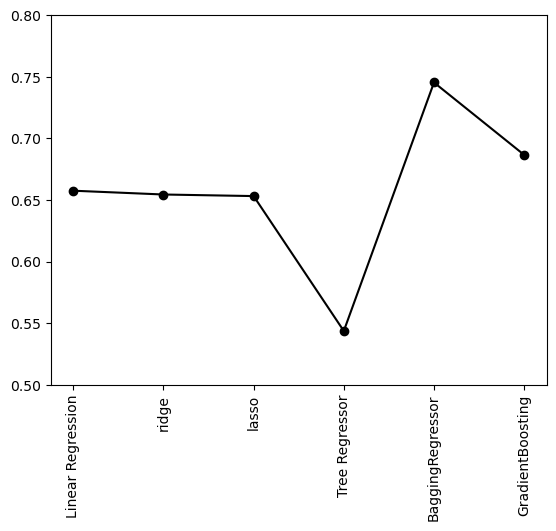

In [151]:
plt.plot(score_result.columns, score_result.iloc[0, :], marker='o', color = 'black')
plt.xticks(rotation = 90)
plt.ylim(0.50, 0.80)
plt.show()

**Observation** Best model score **0.74** for **Bagging Regressor**

**Saving Best Model**

In [152]:
import pickle

In [153]:
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(bagg_reg ,model_file)

**Testing model on random data**

In [154]:
subset = df_encoded.sample(n = 20, random_state = 42)

In [155]:
X_subset = subset.drop('selling_price', axis = 1)
y_subset = subset['selling_price']

In [157]:
print(X_subset.shape)
print(y_subset.shape)

(20, 35)
(20,)


In [159]:
with open('best_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

In [160]:
predictions = best_model.predict(X_subset)

In [162]:
model_eval(y_subset, predictions)

mean absolute error : 180526.55824594648
mean squared error : 164376881810.4055
root mean squared error : 405434.189247041
r2 score : 0.722842447123537


**Saving all datsets**

In [163]:
df_encoded.to_csv('after_preprocessing.csv')

In [164]:
subset.to_csv('subset.csv')